# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# set up for loop counter
cities_count = len(cities)

#set up lists 
# initialize various lists
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = url + "appid=" + weather_api_key + "&q=" + city

# header
print("Beginning Data Retreival")
print("-----------------------------")

# loop through all the cities

for x in range(cities_count):
    print(f"Processing Record {x} of Set something | {cities[x]}.")
    params = {"q":cities[x],
                  "units":"imperial",
                "appid":weather_api_key}
    try:      
        response = requests.get(url, params=params)
        response_json = response.json()
    
        # read the json into the various lists
        City.append(response_json['name'])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Max_Temp.append(response_json['main']['temp_max'])
        Humidity.append(response_json['main']['humidity'])
        Cloudiness.append(response_json['clouds']['all'])
        Wind_Speed.append(response_json['wind']['speed'])
        Country.append(response_json['sys']['country'])
        Date.append(response_json['dt'])
    except:
        print('City not found. Skipping...')

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retreival
-----------------------------
Processing Record 0 of Set something | ushuaia.
Processing Record 1 of Set something | taksimo.
Processing Record 2 of Set something | dikson.
Processing Record 3 of Set something | barrow.
Processing Record 4 of Set something | cape town.
Processing Record 5 of Set something | tsihombe.
City not found. Skipping...
Processing Record 6 of Set something | vardo.
Processing Record 7 of Set something | punta arenas.
Processing Record 8 of Set something | dunedin.
Processing Record 9 of Set something | hilo.
Processing Record 10 of Set something | avarua.
Processing Record 11 of Set something | port alfred.
Processing Record 12 of Set something | mahebourg.
Processing Record 13 of Set something | sindor.
Processing Record 14 of Set something | torbay.
Processing Record 15 of Set something | butaritari.
Processing Record 16 of Set something | severnyy-kospashskiy.
Processing Record 17 of Set something | marshall.
Processing Record 18 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [12]:
# create a data frame from cities, lat, and temp
weather_city = {
    "City": City, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, 
    "Humidity" : Humidity, "Cloudiness": Cloudiness, "Windspeed": Wind_Speed,
    "Country": Country, "Date": Date
}
weather_data = pd.DataFrame(weather_city)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Windspeed,Country,Date
0,Ushuaia,-54.8000,-68.3000,53.60,54,40,13.80,AR,1610224962
1,Taksimo,56.3444,114.8794,-7.38,82,96,2.28,RU,1610225177
2,Dikson,73.5069,80.5464,-6.65,85,100,7.65,RU,1610225158
3,Barrow,71.2906,-156.7887,1.40,78,90,8.05,US,1610225173
4,Cape Town,-33.9258,18.4232,72.00,73,75,6.91,ZA,1610224964


In [13]:
# write data to a csv
weather_data.to_csv('weather_city_file.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
#find out how many entries the df contains
len(weather_data)

554

In [15]:
#  Get the indices of cities that have humidity over 100%.

humidity_data = weather_data.loc[weather_data['Humidity'] > 100]

len(humidity_data)

0

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Observation: This plot showcases the relationship between latitude and temperature. 
As seen in the plot, the temperatures are highest near the equator

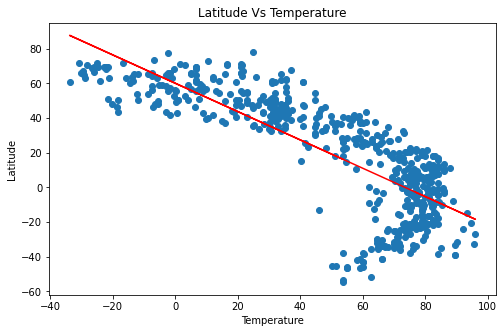

In [16]:
fig, ax1 = plt.subplots(figsize=(8,5))

x_values = weather_data['Max Temp']
y_values = weather_data['Lat']
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Latitude')
ax1.set_title('Latitude Vs Temperature')

plt.scatter(x_values, y_values)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()

fig.savefig("LatvTemp.png")

## Latitude vs. Humidity Plot
This plot showcases the relationship between latitude and humidity. As seen in the plot, there isn't much of a relationship.

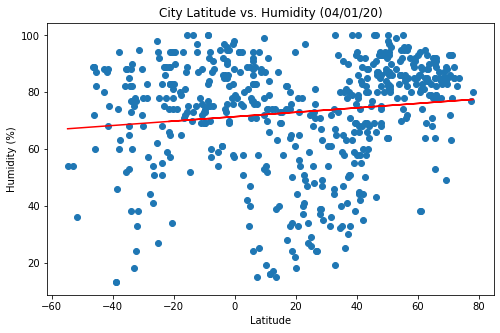

In [17]:
fig, ax2 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Humidity']
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')
ax2.set_title('City Latitude vs. Humidity (04/01/20)')

plt.scatter(x_values, y_values)

#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()

fig.savefig("LatvHumidity.png")

## Latitude vs. Cloudiness Plot
This plot showcases the relationship between latitude and cloudiness. As seen in the plot, there isn't much of a relationship.

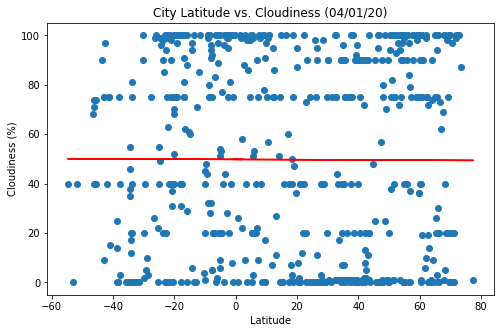

In [23]:
fig, ax3 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Cloudiness (%)')
ax3.set_title('City Latitude vs. Cloudiness (04/01/20)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("LatvCloudiness.png")

## Latitude vs. Wind Speed Plot
This plot showcases the relationship between latitude and windspeed. As seen in the plot, there isn't much of a relationship.

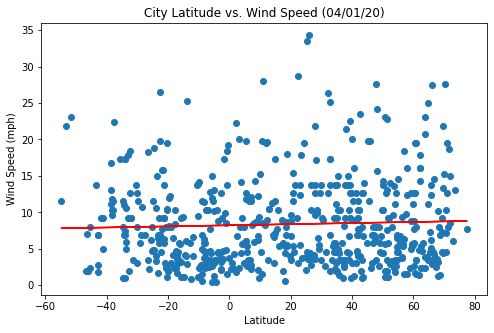

In [24]:
fig, ax4 = plt.subplots(figsize=(8,5))

x_values = weather_data['Lat']
y_values = weather_data['Windspeed']
ax4.set_xlabel('Latitude')
ax4.set_ylabel('Wind Speed (mph)')
ax4.set_title('City Latitude vs. Wind Speed (04/01/20)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("LatvWind")

## Linear Regression

In [19]:
# Create Data Frames

northern_weather_data = weather_data.loc[weather_data['Lat'] > 0]
southern_weather_data = weather_data.loc[weather_data['Lat'] < 0 ]


378

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In the Northern Hemisphere, the further you get away from the equator (0 on the X axis) the temperature decreases


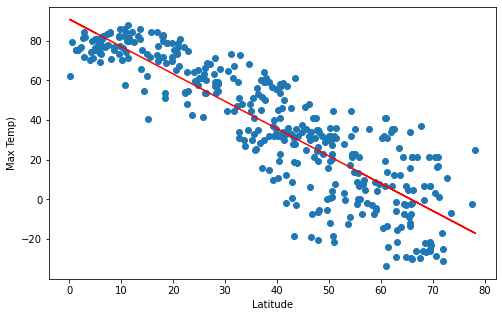

The r-squared is: 0.7612902057725012


In [20]:
fig, ax5 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Max Temp']
ax5.set_xlabel('Latitude')
ax5.set_ylabel('Max Temp)')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_maxtempreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression
In the Southern Hemisphere, the closer you get to the equator (0 on the X axis) the temperature increases

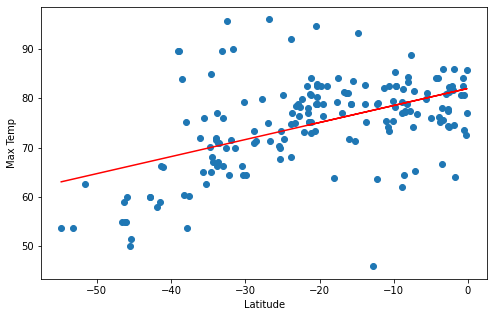

The r-squared is: 0.25743030734872413


In [21]:
fig, ax6 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Max Temp']
ax6.set_xlabel('Latitude')
ax6.set_ylabel('Max Temp')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_maxtempreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
There is a weak positive correlation between Humidity and Latitude in the Northern Hemisphere

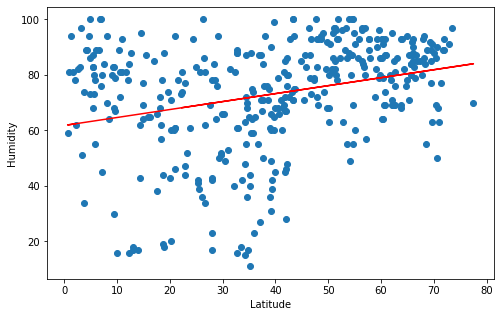

The r-squared is: 0.08438023149655283


In [28]:
fig, ax7 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Humidity']
ax7.set_xlabel('Latitude')
ax7.set_ylabel('Humidity')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_humidityreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
There is a weak positive correlation between Humidity and Latitude in the Southern Hemisphere

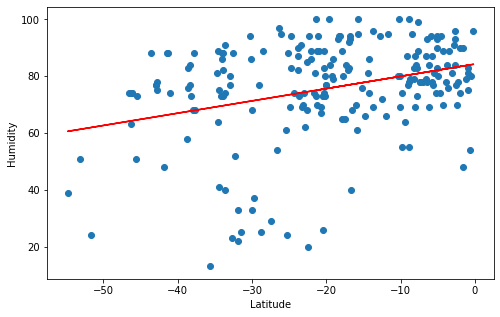

The r-squared is: 0.10364412079762833


In [29]:
fig, ax8 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Humidity']
ax8.set_xlabel('Latitude')
ax8.set_ylabel('Humidity')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_humidityreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
There is a weak positive between Cloudiness and Latitude in the Northern Hemisphere

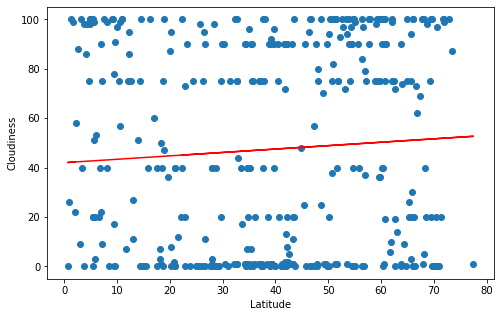

The r-squared is: 0.004567069838103972


In [30]:
fig, ax9 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Cloudiness']
ax9.set_xlabel('Latitude')
ax9.set_ylabel('Cloudiness')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_cloudinessreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

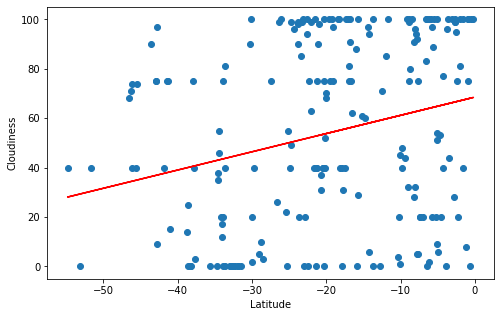

The r-squared is: 0.06721253352932748


In [31]:
fig, ax10 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Cloudiness']
ax10.set_xlabel('Latitude')
ax10.set_ylabel('Cloudiness')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_cloudinessreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

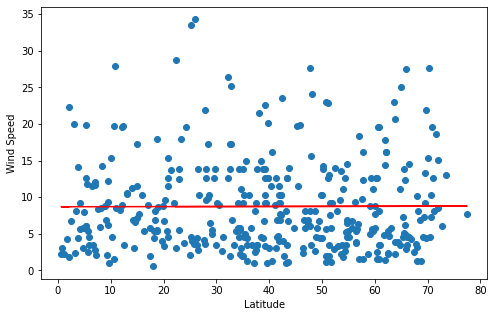

The r-squared is: 1.0623352328460938e-05


In [32]:
fig, ax11 = plt.subplots(figsize=(8,5))

x_values = northern_weather_data['Lat']
y_values = northern_weather_data['Windspeed']
ax11.set_xlabel('Latitude')
ax11.set_ylabel('Wind Speed')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("NH_windreg.png")

print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

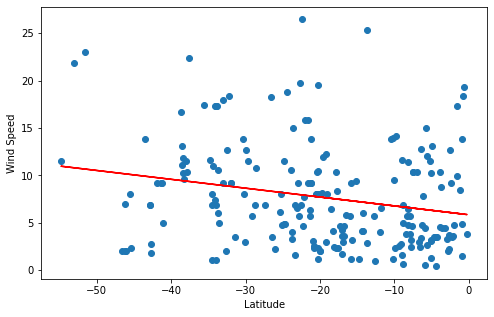

The r-squared is: 0.05251969970442114


In [33]:
fig, ax12 = plt.subplots(figsize=(8,5))

x_values = southern_weather_data['Lat']
y_values = southern_weather_data['Windspeed']
ax12.set_xlabel('Latitude')
ax12.set_ylabel('Wind Speed')

plt.scatter(x_values, y_values)


#Get the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")

plt.show()
fig.savefig("SH_windreg.png")

print(f"The r-squared is: {rvalue**2}")